<a href="https://colab.research.google.com/github/EdWu-datascience/natural-language-proprecessing/blob/main/natural_language_preprocessing_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import twitter_samples

In [ ]:
nltk.download("stopwords")
nltk.download("twitter_samples")

In [8]:
all_pos = twitter_samples.strings('positive_tweets.json')
all_neg = twitter_samples.strings('negative_tweets.json')
print(type(all_pos))
print(all_pos[0:10])
tweets = all_pos+all_neg

<class 'list'>
['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)', '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!', '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!', '@97sides CONGRATS :)', 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days', '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM', "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI", '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.', 'Jgh , but we have to go to Bayan :D bye', 'As an act of mischievousness, am calling the ETL layer of our in-house wareho

In [15]:
#lets label pos as 1 and neg as 0
import numpy as np
pos = np.ones(len(all_pos))
neg = np.zeros(len(all_neg))
label = np.append(pos,neg)
print(type(label))
print(len(label))
print(label)

<class 'numpy.ndarray'>
10000
[1. 1. 1. ... 0. 0. 0.]


In [51]:
def process_tweet(tweet):
  import nltk 
  from nltk.corpus import stopwords
  import re 
  from nltk.tokenize import TweetTokenizer
  import string 
  from nltk.stem import PorterStemmer
  #nltk.download('stopwords')
  #remove url
  tweet = re.sub(r'https?:\/\/.*[\r\n]*','',tweet)
  # remove the '@' letter from string
  tweet = re.sub(r'@','',tweet)
  #remove stopwords
  toke = TweetTokenizer()
  tweet = toke.tokenize(tweet)
  stopword = list(stopwords.words('english'))
  tweet_filtered = []
  for L in tweet:
    if L not in stopword:
      tweet_filtered.append(L)
  tweet_pun = []
  #remove punctuation
  punctuation=string.punctuation
  for P in tweet_filtered:
    if P not in punctuation:
      tweet_pun.append(P)
  STEM = PorterStemmer()
  tweet_processed = []
  for L in tweet_pun:
    word = STEM.stem(L)
    tweet_processed.append(word)
  return tweet_processed

In [47]:
#they have inner frequency count function but we will build our own 
def build_fre(tweets,label):
  fre = {}
  #zip() function could used to pair elements of corresponding objects into tuple
  for label,tweet in zip(label,tweets):
    for L in process_tweet(tweet):
      pair = (L,label)
      if pair in fre:
        fre[pair]+=1
      else:
        fre[pair]=1
  return fre 

In [52]:
fre = build_fre(tweets,label)

In [96]:
i = 0
for key in fre:
  print(key)
  print(fre[key])
  if i == 100:
    break 
  else:
    i = i + 1

('#followfriday', 1.0)
25
('france_int', 1.0)
1
('pkuchli', 1.0)
1
('57', 1.0)
2
('milipol_pari', 1.0)
1
('top', 1.0)
32
('engag', 1.0)
7
('member', 1.0)
16
('commun', 1.0)
32
('week', 1.0)
83
(':)', 1.0)
3568
('lamb', 1.0)
1
('2ja', 1.0)
1
('hey', 1.0)
76
('jame', 1.0)
7
('how', 1.0)
24
('odd', 1.0)
2
(':/', 1.0)
5
('pleas', 1.0)
97
('call', 1.0)
37
('contact', 1.0)
7
('centr', 1.0)
2
('02392441234', 1.0)
1
('abl', 1.0)
8
('assist', 1.0)
1
('mani', 1.0)
33
('thank', 1.0)
620
('despiteoffici', 1.0)
1
('listen', 1.0)
16
('last', 1.0)
47
('night', 1.0)
68
('As', 1.0)
5
('you', 1.0)
123
('bleed', 1.0)
2
('amaz', 1.0)
51
('track', 1.0)
5
('when', 1.0)
14
('scotland', 1.0)
2
('97side', 1.0)
1
('congrat', 1.0)
21
('yeaaaah', 1.0)
1
('yippppi', 1.0)
1
('accnt', 1.0)
2
('verifi', 1.0)
2
('rqst', 1.0)
1
('succeed', 1.0)
1
('got', 1.0)
68
('blue', 1.0)
9
('tick', 1.0)
1
('mark', 1.0)
2
('fb', 1.0)
1
('profil', 1.0)
2
('15', 1.0)
8
('day', 1.0)
245
('bhaktisbant', 1.0)
17
('pallaviruhail', 1.0)
8

In [65]:
#lets test some keys
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
         ':)', ':(','hate',
        'song', 'idea', 'top', 'play', 'magnific']
data = []
for key in keys:
  pos = 0
  neg = 0
  if (key,1.0) in fre:
    pos = fre[(key,1.0)]
  if (key,0.0) in fre:
    neg = fre[(key,0.0)]
  data.append([key,pos,neg])
print(data)

[['happi', 205, 25], ['merri', 1, 0], ['nice', 98, 19], ['good', 238, 101], ['bad', 18, 68], ['sad', 5, 121], ['mad', 2, 11], ['best', 65, 22], ['pretti', 19, 15], [':)', 3568, 2], [':(', 1, 4571], ['hate', 13, 57], ['song', 21, 27], ['idea', 26, 10], ['top', 32, 6], ['play', 46, 48], ['magnific', 1, 0]]


[5.327876168789581, 0.6931471805599453, 4.59511985013459, 5.476463551931511, 2.9444389791664403, 1.791759469228055, 1.0986122886681098, 4.189654742026425, 2.995732273553991, 8.18004072349016, 0.6931471805599453, 2.6390573296152584, 3.091042453358316, 3.295836866004329, 3.4965075614664802, 3.8501476017100584, 0.6931471805599453]
[3.258096538021482, 0.0, 2.995732273553991, 4.624972813284271, 4.23410650459726, 4.804021044733257, 2.4849066497880004, 3.1354942159291497, 2.772588722239781, 1.0986122886681098, 8.427706024914702, 4.060443010546419, 3.332204510175204, 2.3978952727983707, 1.9459101490553132, 3.8918202981106265, 0.0]
['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti', ':)', ':(', 'hate', 'song', 'idea', 'top', 'play', 'magnific']


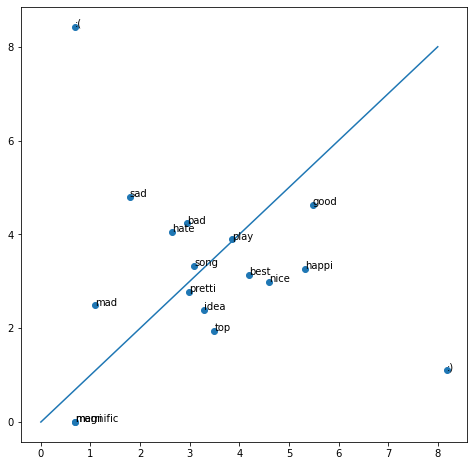

In [87]:
import matplotlib.pyplot as plt
#ax指的是子图对象
fig,ax = plt.subplots(figsize=(8,8))
#we use x represent positive, y represent negative
x = []
y = []
name = []
for I in data:
  x.append(np.log(I[1]+1))
  y.append(np.log(I[2]+1))
  name.append(I[0])

print(x)
print(y)
print(name)
ax.scatter(x,y)
for i,txt in enumerate(name):
  ax.annotate(txt,(x[i],y[i]))
a = list(range(9))
b = list(range(9))
plt.plot(a,b)
